In [75]:
    
    width = float(request.form.get("width"))
    length = float(request.form.get("length"))
    swath = float(request.form.get("swath"))
    
    #render error or default max width
    if width * length > 640001:
        width = 800
        length = 800

    manager = Manager(field = [[0,0],[0,length],[width,length],[width,0]],
                                use_drift = True, 
                                 use_jump = True, 
                                 easting_drift_const = .01,
                                 northing_drift_const = .01,
                                 mean_jump = Coord(0,0,std = [.05, .05]),
                                 jump_occurance_probability = 5,
                                 drift_variability = Coord(0,0, std = [.001, .001]),
                                 easting_jump_const = .2,
                                 northing_jump_const = .2,
                                 tractor_speed = 1, 
                                 epoch_frequency = 1, 
                                 rename_keys = ["epoch", "real_e", "real_n", "real_e_std", "real_n_std"], 
                                 is_static = False, 
                                 true_std = [.1,.1],
                                tractor_width = swath)
    
    data = io.BytesIO()
    plt.plot([1, 2, 3, 4])
    plt.ylabel('some numbers')
    plt.savefig(data, format='png', bbox_inches="tight")
    plt.close()
    encoded_img_data = base64.b64encode(data.getvalue())
    
    #test = manager.plot_a()
    test = encoded_img_data.decode('UTF-8')

    
    # Cost summary params
    seed = 0.016 # cost per m
    fert = 0.015 # cost per m
    herb = 0.012 # cost per m
    crop = 0.246 # profit per m
    net = 0.203 # net profit per m
    cost_params = [seed, fert, herb, crop, net]
    
    # Field area
    tot_area = width * length
    
    field_params = [width, length, tot_area, swath]
    
    # Maximum profit 
    tot_prof = net * tot_area
    
    # Peramters derived from over/underlap; true profit
    derived_params = [tot_prof * 0.60]
    
    # Area Coverage params; zero pass area, single pass area, double pass area
    area_params = [manager.zero_pass_area, 
                   manager.single_pass_area, 
                   manager.double_pass_area]
    
    #losses; seed, fertilizer, harvest
    zero_pass_loss = [.203*manager.zero_pass_area,
                      .1258*manager.zero_pass_area,
                      .203*manager.zero_pass_area]
    
    double_pass_loss = [.01637*manager.double_pass_area,
                        .026984**manager.double_pass_area,
                        0]
                      
    # Area coverage figures; all, zero pass, single pass, double pass
    area_plts = [manager.clean_track_plot, 
                 manager.zero_pass_plot, 
                 manager.single_pass_plot, 
                 manager.double_pass_plot]
    
    # Error plots; detected track jumps, pass-to-pass accuracy, drift comaprison, 
    error_plts = [manager.sim_v_ED_cum_easting_drift_plot, 
                  manager.sim_v_ED_cum_northing_drift_plot, 
                 manager.sim_v_ED_cum_easting_jump_plot]

is_static --> False
Epochs Processed: 40: 100%|███████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 617.02it/s]


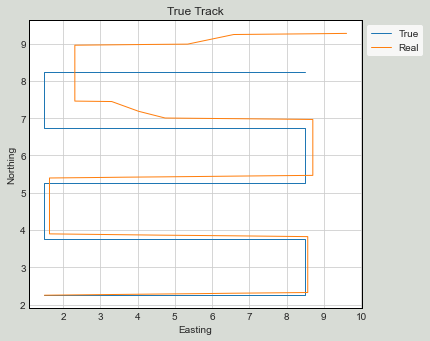

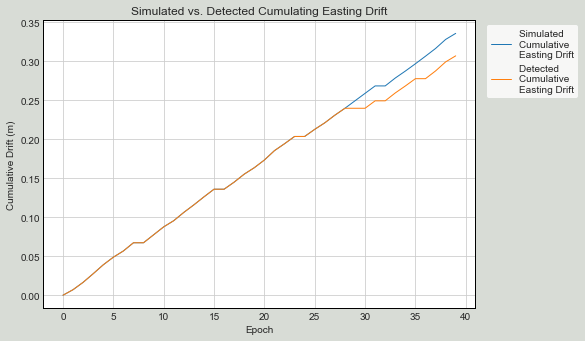

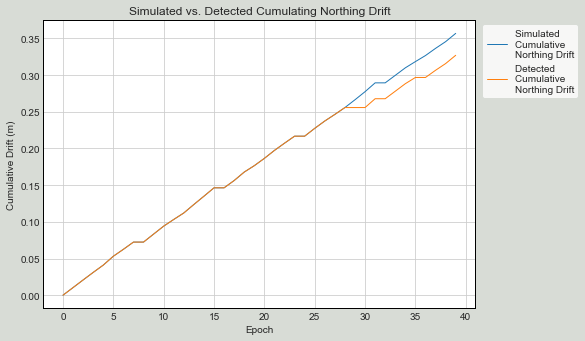

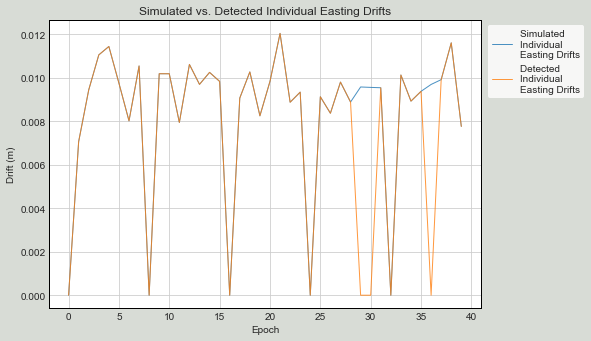

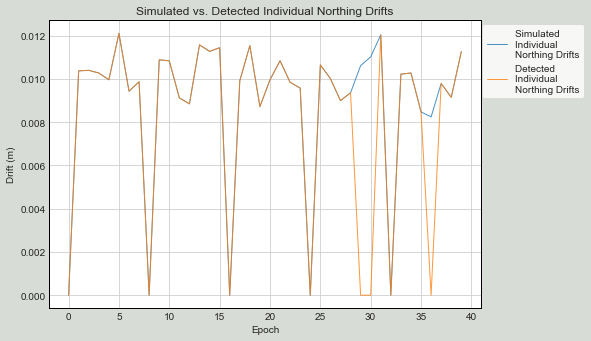

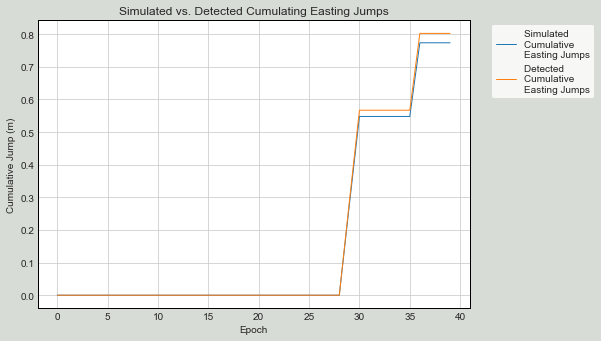

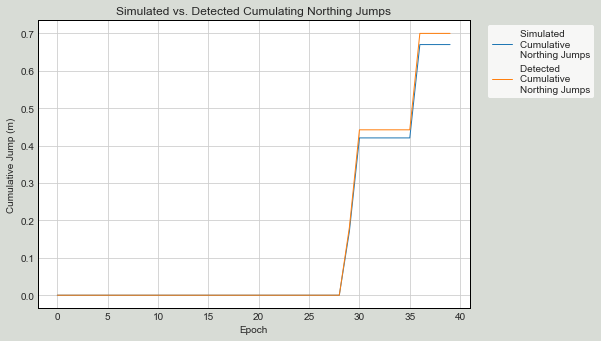

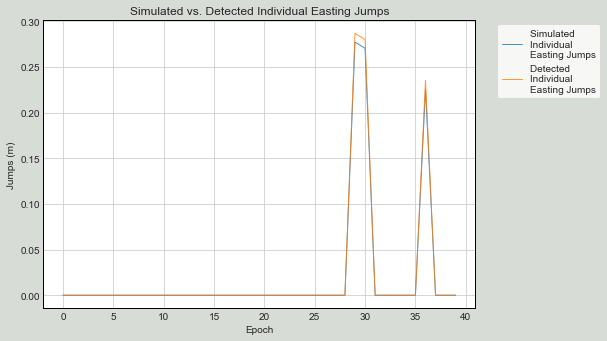

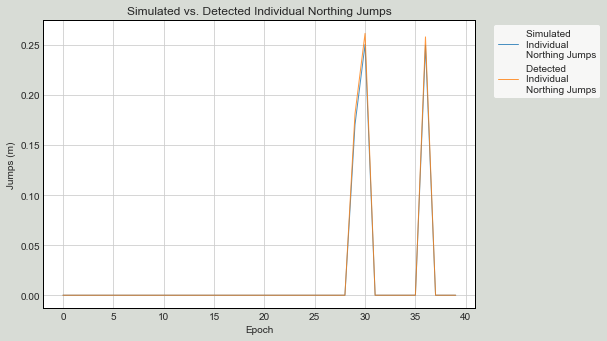

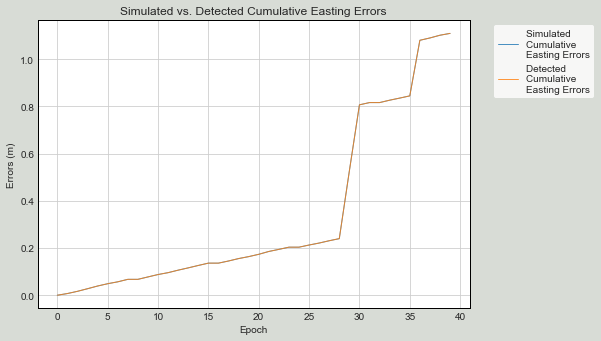

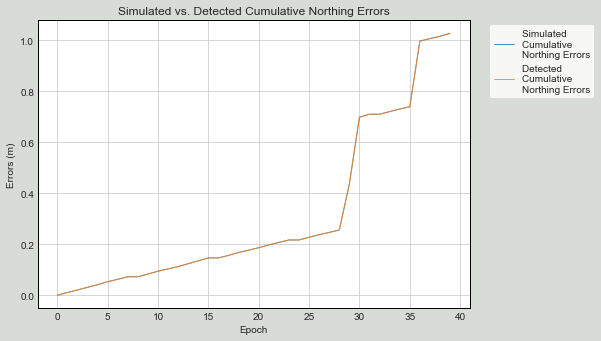

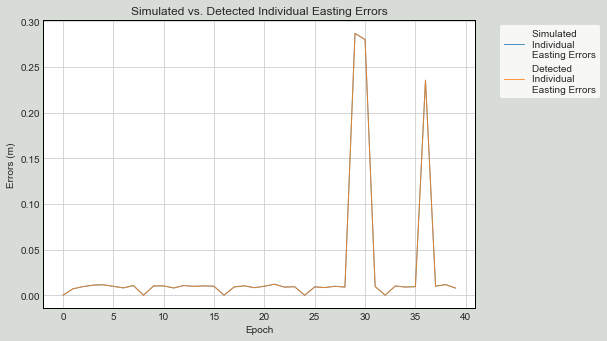

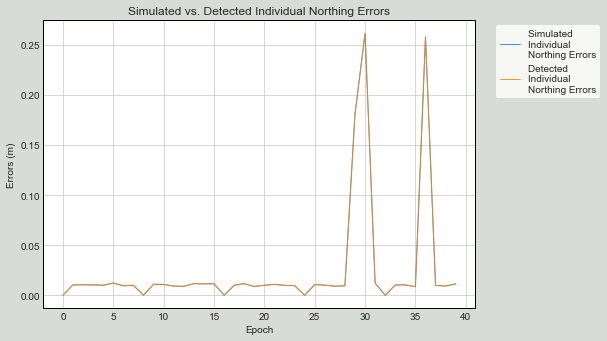

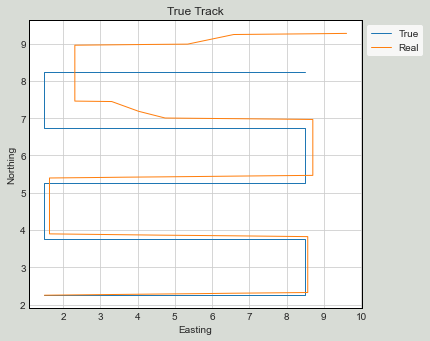

'iVBORw0KGgoAAAANSUhEUgAAAb4AAAEuCAYAAADx63eqAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAEiklEQVR4nO3VMQEAIAzAMMC/5+ECjiYK+nXPzCwAiDi/AwDgJeMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOM

In [1]:
from manager import Manager
from point import Coord

manager = Manager(field = [[0,0],[0,10],[10,10],[10,0]],
                use_drift = True, 
                 use_jump = True, 
                 easting_drift_const = .01,
                 northing_drift_const = .01,
                 mean_jump = Coord(0,0,std = [.05, .05]),
                 jump_occurance_probability = 500,
                 drift_variability = Coord(0,0, std = [.001, .001]),
                 easting_jump_const = .2,
                 northing_jump_const = .2,
                 tractor_speed = 1, 
                 epoch_frequency = 1, 
                 rename_keys = ["epoch", "real_e", "real_n", "real_e_std", "real_n_std"], 
                 is_static = False, 
                 true_std = [.1,.1],
                tractor_width = 1.5)


manager.plot_a()

In [3]:
manager.df_sim.index.to_list()[-1]+1

40

In [10]:
sum(manager.df_sim.jump_status.to_list())
sum(manager.df_sim.drift_status.to_list())
sum(manager.df_sim.error_status.to_list())

48

In [9]:
sum(manager.df_ED.jump_status.to_list())
sum(manager.df_ED.drift_status.to_list())
sum(manager.df_ED.error_status.to_list())

46.0

In [12]:
manager.df_sim.error_cumulative_n.to_list()[-1]
manager.df_sim.error_cumulative_e.to_list()[-1]
manager.df_sim.drift_cumulative_n.to_list()[-1]
manager.df_sim.drift_cumulative_e.to_list()[-1]
manager.df_sim.jump_cumulative_n.to_list()[-1]
manager.df_sim.jump_cumulative_e.to_list()[-1]

manager.df_ED.error_cumulative_n.to_list()[-1]
manager.df_ED.error_cumulative_e.to_list()[-1]
manager.df_ED.drift_cumulative_n.to_list()[-1]
manager.df_ED.drift_cumulative_e.to_list()[-1]
manager.df_ED.jump_cumulative_n.to_list()[-1]
manager.df_ED.jump_cumulative_e.to_list()[-1]

0.0

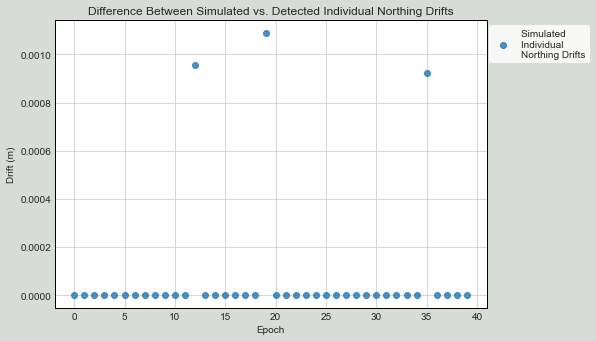

'iVBORw0KGgoAAAANSUhEUgAAAb4AAAEuCAYAAADx63eqAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAEiklEQVR4nO3VMQEAIAzAMMC/5+ECjiYK+nXPzCwAiDi/AwDgJeMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOMDIMX4AEgxPgBSjA+AFOM

In [2]:
manager.plot_t()

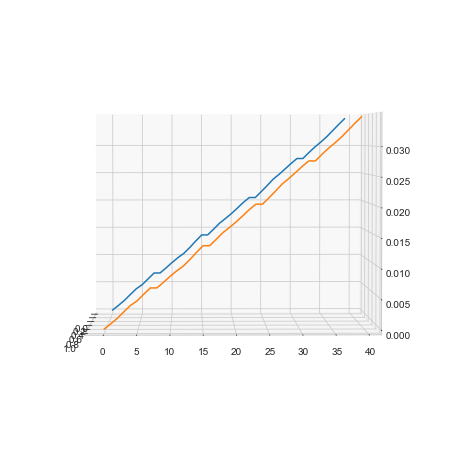

In [38]:
import matplotlib.pyplot as plt
import numpy as np

x = manager.df_sim.index.to_list()
y = manager.df_sim.drift_cumulative_n.to_list()
    
#create ofset lines
offsets = []
#for i in range(len(x)):
offsets.append(np.ones(len(x))*0)

x1 = manager.df_ED.index.to_list()
y1 = manager.df_ED.drift_cumulative_n.to_list()

fig = plt.figure(figsize = (8,8))

offsets.append(np.ones(len(x))*1)
            
        #fig, ax = plt.subplots()
        
ax = plt.axes(projection='3d')
        
        # Colour outside axes
        #fig.patch.set_facecolor('xkcd:light grey')

#self.set_parameters(ax, x_label, y_label, title, aspect = aspect)

#for i in range(len(x)):
#    ax.plot3D(x[i],y[i], offsets[i], label = line_label[i])
ax.plot3D(offsets[0], x,y) 


ax.plot3D(offsets[1], x1,y1) 

        
#plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
        
        # Set plot limits
        #plt.xlim(0, 12)
        #plt.ylim(0, 12)
        
#elf.set_legend(anchor)
        
ax.view_init(2, -1)
plt.draw()
#plt.show() 
#manager.plot_i()

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,)  and requested shape (40,)

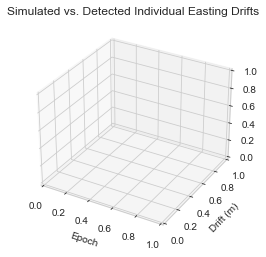

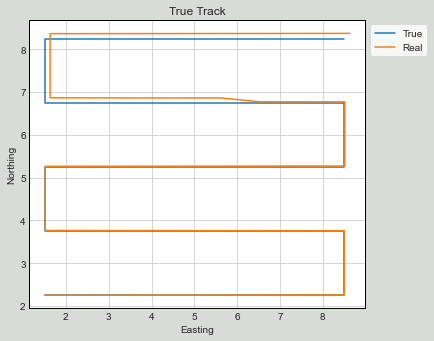

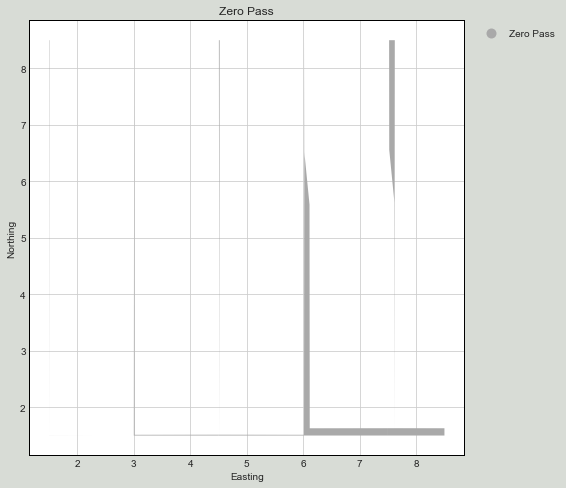

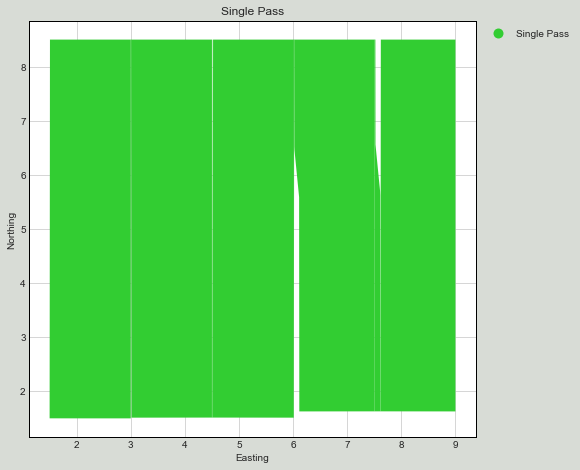

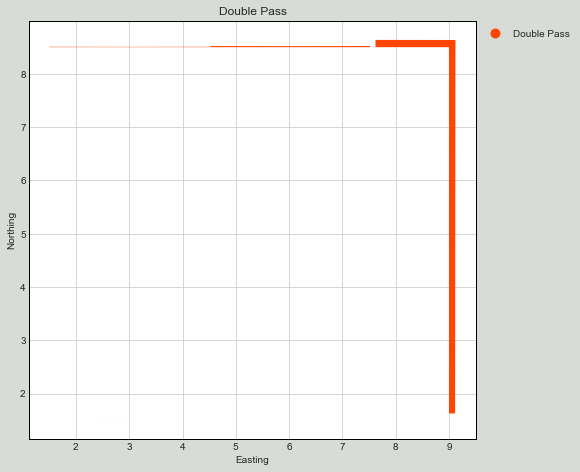

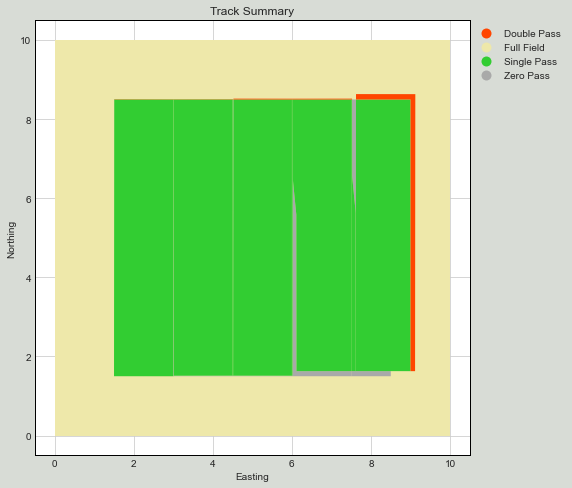

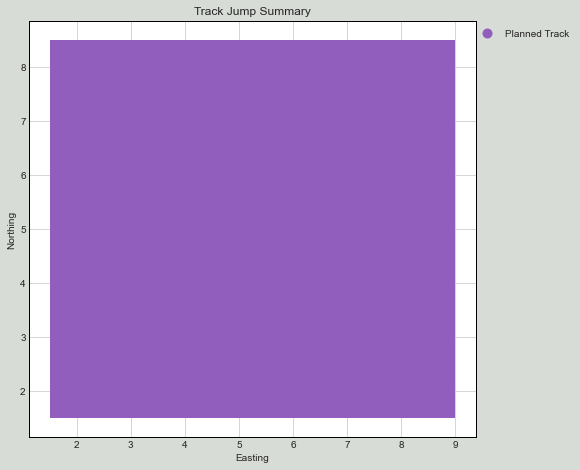

In [3]:
manager.plot_a()
manager.plot_b()
manager.plot_c()
manager.plot_d()
manager.plot_e()
manager.plot_f()
#manager.df_sim

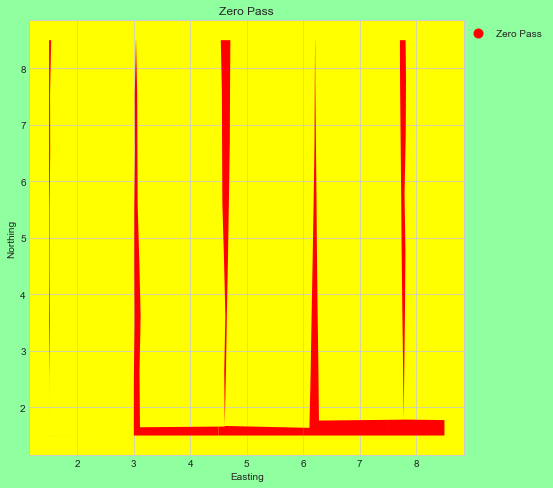

In [3]:
manager.plot_b()

In [6]:
manager.Sim.single_pass.columns

Index(['color', 'geometry', 'title'], dtype='object')

<AxesSubplot:>

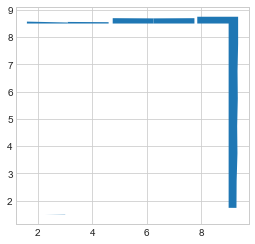

In [4]:
manager.Sim.double_pass.plot()

<AxesSubplot:>

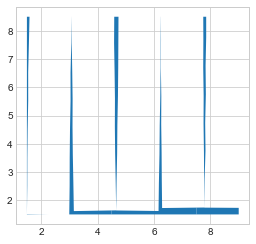

In [6]:
manager.Sim.temp.plot()

<AxesSubplot:>

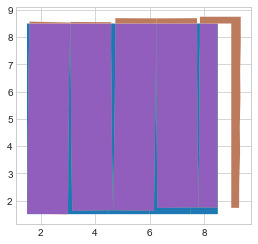

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#manager.Sim.inner.plot(ax=ax)
manager.Sim.inner_gdf.plot(ax=ax, color='#49e37c')
#manager.Sim.temp.plot(ax=ax, color='red')
manager.Sim.zero_pass.plot(ax=ax)
manager.Sim.single_pass.plot(ax=ax, color = '#915ebd')
manager.Sim.double_pass.plot(ax=ax, color = '#bd7b5e')

<AxesSubplot:>

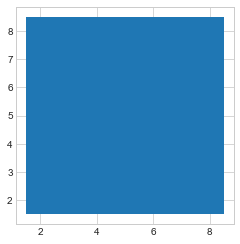

In [8]:
manager.Sim.inner_gdf.plot()

NameError: name 'manager' is not defined

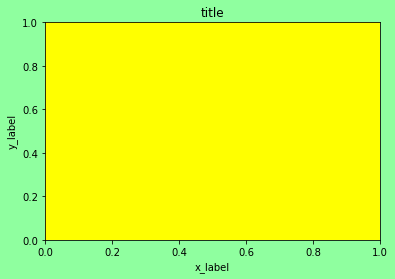

In [1]:
import matplotlib.pyplot as plt

x_label="x_label"
y_label="y_label"
title="title"

fig, ax = plt.subplots()

fig.patch.set_facecolor('xkcd:mint green')


ax.set_ylabel(y_label)
ax.set_xlabel(x_label)
ax.set_title(title)

ax.set_facecolor("yellow")

manager.Sim.T_gdf_pt.plot(ax=ax)
manager.Sim.R_gdf_pt.plot(ax=ax)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('purple')
frame.set_edgecolor('white')
frame.set_linewidth(0)
        
plt.show()
        

        ##ax.set_aspect('equal')

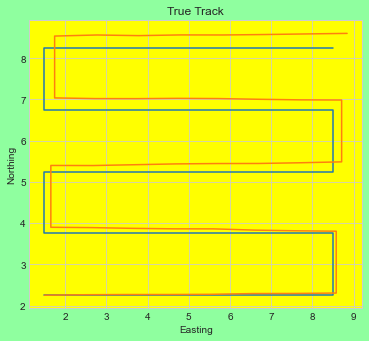

In [123]:
from manager import Manager

manager = Manager()
sim = manager.Sim
df = sim.output_tracks

20

In [13]:
from positionGenerator import PositionGenerator as PG
from point import Coord
pg = PG(Coord(.2,.2,std = [0, 0]))

In [14]:
pg.generate_one()
pg.unique_pnt

[0.2, 0.2]

In [23]:
from random import randint

for i in range(100):
    print(randint(1,5))


3
5
1
4
2
2
1
4
4
2
3
4
3
1
2
1
5
4
2
3
5
1
1
3
3
3
3
4
1
2
1
3
3
4
3
1
3
4
4
4
3
5
3
2
2
3
5
4
2
3
2
2
5
1
4
5
5
5
4
5
5
3
1
3
2
5
3
1
2
1
5
5
1
1
3
4
4
2
5
4
1
3
4
3
2
3
3
4
1
3
1
2
1
1
2
5
5
2
2
2
